In [1]:
import numpy as np

## Маршрутное шифрование
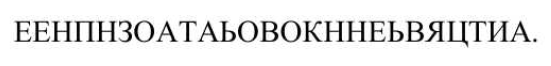

In [15]:
key = 'пароль'
message = 'нельзянедооцениватьпротивника'
alphabet = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'

In [3]:
def path(alp, k, mes):
    alp = list(alp)
    k = list(k)
    mes = list(mes)
    n = len(k)
    m = len(mes)//n
    if (len(mes)//n != 0):
        m+=1
    matr = [[np.random.choice(alp) for i in range(0, n)] for j in range (m)]
    c = 0
    for i in range(m):
        for j in range(n):
            if c < len(mes):
                matr[i][j] = mes[c]
                c += 1
    matr.append(k)
    way = sorted(matr[len(matr) - 1])
    new_mes = []
    for i in way:
        for j in range(len(matr)):
            if j == len(matr) - 1:
                continue
            new_mes += matr[j][matr[len(matr) - 1].index(i)]
    new_mes = ''.join(new_mes)
    return new_mes

In [16]:
new_message = path(alphabet, key, message)

In [17]:
print(message, "- сообщение")
print(new_message, "- зашифрованное собщение")

нельзянедооцениватьпротивника - сообщение
еенпнзоатаьовокннеьвлдирияцтиц - зашифрованное собщение


In [18]:
len(message) == len(new_message)

False

## Шифрование с помощью решеток
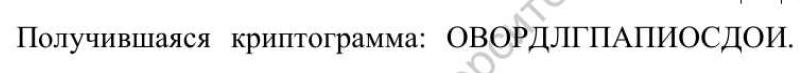

In [6]:
key = 'шифр'
message = 'договорподписали'
alphabet = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'

In [7]:
def delete(b_m, i_1, k_1):
    for i in range(2*k_1):
        for j in range(2*k_1 - i):
            if b_m[j][i] == i_1:
                b_m[j][i] = ' '
                return

In [8]:
def lattice(alp, key, mes):
    key = list(key)
    mes = list(mes)
    alp = list(alp)
    k = int(np.sqrt(len(key)))
    matr1 = [[i for i in range(k)] for i in range(k)]
    c = 1
    for i in range(k):
        for j in range(k):
            matr1[i][j] = c
            c += 1
    matr2 = np.rot90(matr1, k = 1, axes = (1, 0))
    matr3 = np.rot90(matr2, k = 1, axes = (1, 0))
    matr4 = np.rot90(matr3, k = 1, axes = (1, 0))
    bigmatr_n = [[0 for i in range(2*k)] for i in range(2*k)]
    for i in range(k):
        for j in range(k):
            bigmatr_n[i][j] = matr1[i][j]
            bigmatr_n[i][j + k] = matr2[i][j]
            bigmatr_n[i + k][j + k] = matr3[i][j]
            bigmatr_n[i + k][j] = matr4[i][j]
    bigmatr_l = [[' ' for i in range(2*k)] for i in range(2*k)]
    print(bigmatr_n)
    list1 = [i for i in range(1, k**2+1)]
    for i in list1:
        delete(bigmatr_n, i, k)
    print(bigmatr_n)
    for i in range(4):
        for i in range(k*2):
            for j in range(k*2):
                if bigmatr_n[i][j] == bigmatr_l[i][j] and len(mes) > 0:
                    bigmatr_l[i][j] = mes[0]
                    mes = mes[1:]
        bigmatr_n = np.rot90(bigmatr_n, k = 1, axes = (1, 0))
    bigmatr_l.append(key)
    way = sorted(bigmatr_l[len(bigmatr_l) - 1])
    new_mes = []
    for i in way:
        for j in range(len(bigmatr_l)):
            if j == len(bigmatr_l) - 1:
                continue
            new_mes += bigmatr_l[j][bigmatr_l[len(bigmatr_l) - 1].index(i)]
    print(bigmatr_l)
    new_mes = ''.join(new_mes)
    return new_mes

In [9]:
new_message = lattice(alphabet, key, message)

[[1, 2, 3, 1], [3, 4, 4, 2], [2, 4, 4, 3], [1, 3, 2, 1]]
[[' ', 2, 3, 1], [' ', ' ', 4, 2], [' ', 4, 4, 3], [1, 3, 2, 1]]
[['д', 'в', 'о', 'р'], ['о', 'г', 'п', 'о'], ['о', 'с', 'д', 'п'], ['а', 'л', 'и', 'и'], ['ш', 'и', 'ф', 'р']]


In [10]:
print(message, "- сообщение")
print(new_message, "- зашифрованное собщение")

договорподписали - сообщение
вгслропиопдидооа - зашифрованное собщение


## Таблица Виженера
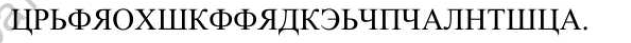

In [11]:
alphabet = 'абвгдежзийклмнопрстуфхцчшщыьэюя'
key = 'математика'
message = 'криптографиясерьезнаянаука'

In [12]:
def vigenere(a, k, m):
    a = list(a)
    m = list(m)
    while len(k) < len(m):
        k += k
    k = k[:len(m)]
    k = list(k)
    new_a = []
    for i in range(len(a)):
        tmp = a[i:] + a[:i]
        new_a.append(tmp)
    new_a = np.array(new_a)
    new_m = []
    for i,j in zip(m, k):
        x = [idx for idx,q in enumerate(new_a[0,:]) if q == i][0]
        y = [idx for idx,q in enumerate(new_a[:,0]) if q == j][0]
        new_m += new_a[x,y]
    new_m = ''.join(new_m)
    return new_m

In [13]:
new_message = vigenere(alphabet, key, message)

In [14]:
print(message, "- сообщение")
print(new_message, "- зашифрованное собщение")

криптографиясерьезнаянаука - сообщение
црыфяохшкффядкэьчпчалнтшца - зашифрованное собщение
